### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [2]:
library(ggplot2)
library(dplyr)
library(reshape2)
library(tibble)

In [3]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [4]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [5]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [6]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Functions &  List creations

These are all the functions and lists that will be called/needed below.

In [7]:
#List of all Dataframes
Cities = list(ny, wash, chi)

#Creating an empty Dataframe
ListTop10=data.frame(Date=as.Date(character()),
                 File=character(), 
                 User=character(), 
                 stringsAsFactors=FALSE)

Binded=data.frame(Date=as.Date(character()),
                 File=character(), 
                 User=character(), 
                 stringsAsFactors=FALSE)

MonthlyAve=data.frame(Date=as.Date(character()),
                 File=character(), 
                 User=character(), 
                 stringsAsFactors=FALSE)

myplots = list()
df.Identity = list()



In [8]:
get.Identity = function(i){    
    #Determine graph color and nick-names.
    if(i == 1){
        df.Identity = list("red", "NY","New York", "Top 10 Starting Locations for New York") 
    } else if (i == 2){
        df.Identity = list("green", "Wash", "Washington, DC", "Top 10 Starting Locations for Washington, DC")    
    } else if (i == 3){
        df.Identity = list("blue", "Chi", "Chicago", "Top 10 Starting Locations for Chicago")    
    } else {
        df.Identity = list("yellow", "idk", "WHAT DID YOU DO", "Top 10 Starting Locations for ::NEW DATAFRAME::") }
return(df.Identity)  } 
        
get.Top10List = function(df){                     
    #Create a top 10 Starting Stations for each City. 
    #Convert to Dataframe and rename first column
    numRows = nrow(df)
    Top10 = head(summary(df$Start.Station), 10)
    Top10 = as.data.frame(Top10)
    Top10$Prop = Top10[,1]/numRows
    Top10 = Top10 %>% rownames_to_column('Start.Location')      
return(Top10) }
        
get.Top10Graph = function(Top10, Title) {
     p1 = eval(substitute(ggplot() + geom_bar(Top10, mapping = aes(x=reorder(Start.Location, -Prop), y=Prop), stat ="identity", fill = df.Identity[1]) + 
        theme(axis.text.x = element_text(angle=90, vjust=1)) + 
        labs(title=Title, x="Starting Location", y="Percent of total city rentals")+
        geom_text(data=Top10, aes(x=Start.Location, y=Prop),label=scales::percent(round(Top10$Prop, digits=3)),
        inherit.aes=FALSE,color='black',position=position_dodge(0.75),hjust=-0.05,vjust=.50,size=4, angle=90) +
        ylim(0,(Top10$Prop[1]*1.1)), list(i = i)))
return(p1) }

get.Weekday = function(df, df.Identity){
    df$Weekday = weekdays(as.Date(df$Start.Time))
    dfT = as.data.frame(table(df$Weekday))
    dfT$Prop = dfT$Freq/(sum(dfT$Freq))
    dfT$City = df.Identity[[3]]
    return(dfT)}

get.MonthlyAve = function(df){
    df$Start.Time = as.Date(df$Start.Time)
    df$month = months(df$Start.Time)
    df$year = format(df$Start.Time, format="%y")
    dfPlot = as.data.frame(aggregate(Trip.Duration ~ month+year, df, mean))
    return(dfPlot) }



### Question 1


What are the top 10 pick up locations for each city?

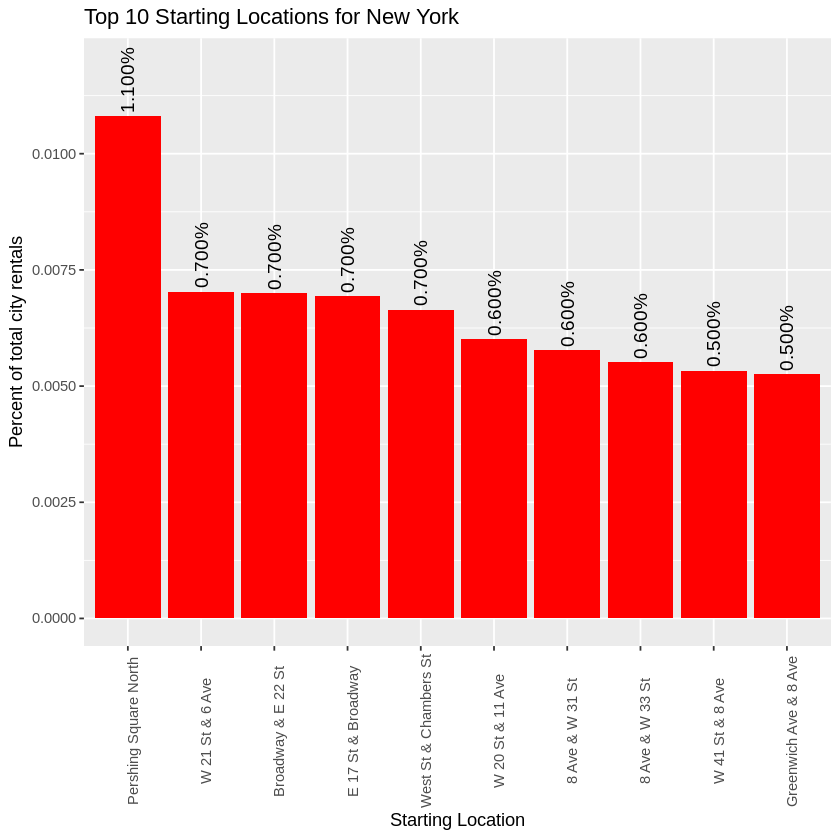

[[1]]

[[2]]

[[3]]


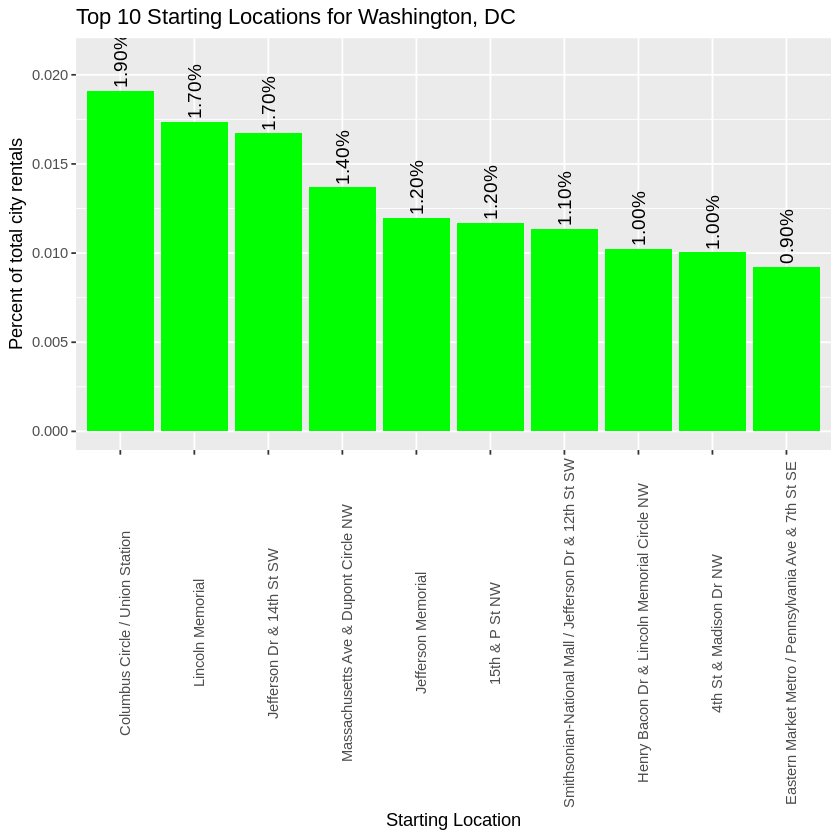

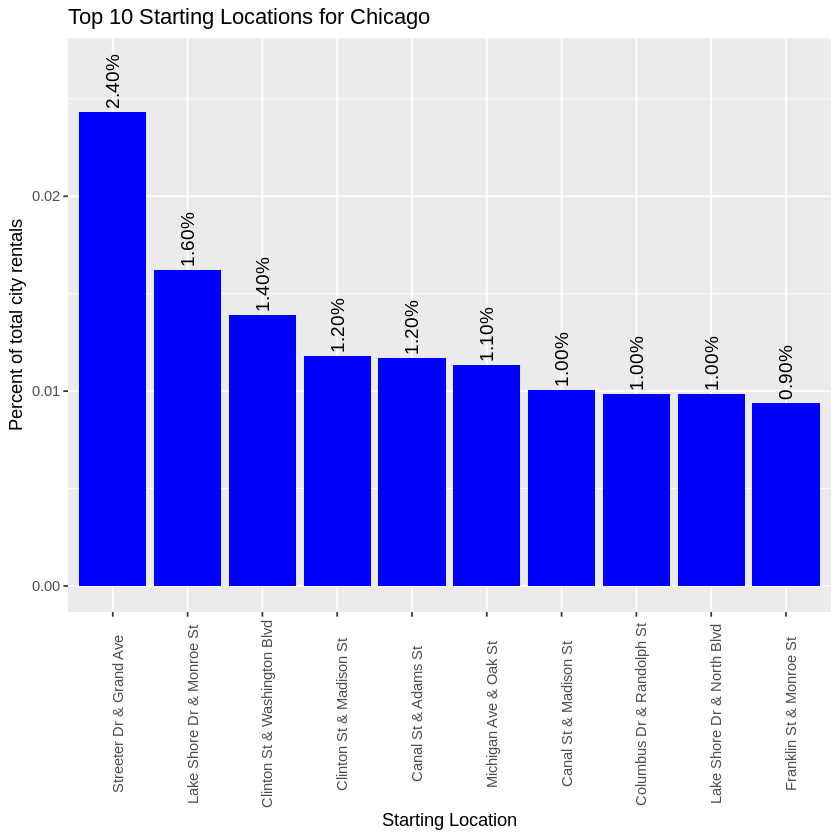

In [9]:
 #pass Dataframe name. If no name, default is Cities List
for(i in 1:length(Cities)){
    df.Identity = get.Identity(i)
    
    df = Cities[[i]]
    Top10 = get.Top10List(df)
    
    Top10$City = df.Identity[3]
    ListTop10 = rbind(ListTop10, Top10)
    
    Title = df.Identity[4]
    p1 = get.Top10Graph(Top10, Title)
    myplots[[i]] = p1}
myplots

In [10]:
ListTop10

Start.Location,Top10,Prop,City
Pershing Square North,592,0.010808837,New York
W 21 St & 6 Ave,385,0.007029396,New York
Broadway & E 22 St,383,0.006992879,New York
E 17 St & Broadway,380,0.006938105,New York
West St & Chambers St,364,0.006645974,New York
W 20 St & 11 Ave,329,0.006006938,New York
8 Ave & W 31 St,316,0.005769582,New York
8 Ave & W 33 St,302,0.005513968,New York
W 41 St & 8 Ave,292,0.005331386,New York
Greenwich Ave & 8 Ave,288,0.005258353,New York


The top 10 location rentals are listed. Washington,DC's top 10 locations had more rental occurances than the top 10 of New York City and Chicago.  However, the top Chicago location has a greater percent of the overall rentals for the city of Chicago.

For example, the Top rental location in Washington, DC, Columbus Circle / Union Station, had a total of 1700 rentals.  However, that was only 1.9% of the overall Washington, DC rentals. 
Chicago's top rental location, Streeter Dr & Grand Ave, only had 210 rentals, but that was 2.4% of all the Chicago rentals. 
New York City's Pershing Square North location had 510 rentals, but that's only 1.08% of all rentals.

### Question 2

What is the most popular day of the week for rentals in each City?

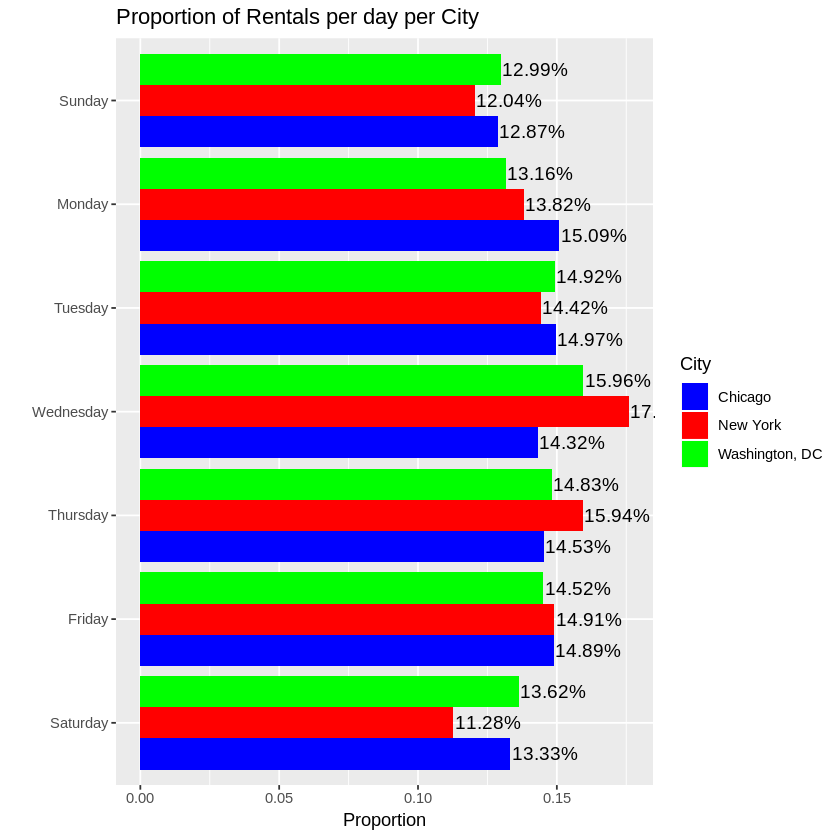

In [11]:
for(i in 1:length(Cities)){
    df.Identity = get.Identity(i)
    City = df.Identity[[3]]

    df = Cities[[i]]
    
    dfT = get.Weekday(df, df.Identity)
    
    Binded = rbind(Binded, dfT)
    i = i+1}

Binded = Binded %>% 
    mutate(Var1 = factor(Var1, levels = c('Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'))) %>% 
    arrange(City, Var1)

ggplot(Binded, aes(x=factor(Var1), y=Prop, fill=City, group=City)) + 
    geom_bar(stat="identity", position="dodge")+
    scale_x_discrete(limits=c("Saturday", "Friday", "Thursday", "Wednesday", "Tuesday", "Monday", "Sunday"))+
    scale_fill_manual(values=c("Blue", "Red", "Green")) +
    labs(title="Proportion of Rentals per day per City", x="", y="Proportion") +
    geom_text(data=Binded, aes(x=factor(Var1),y=Prop,group=City,label=scales::percent(round(Prop, digits=4))),inherit.aes=FALSE,
    color='black',position=position_dodge(0.9),hjust=-.02,vjust=.5,size=4) +
    coord_flip()



In [12]:
Binded

Var1,Freq,Prop,City
Sunday,1111,0.1287370,Chicago
Monday,1302,0.1508691,Chicago
Tuesday,1292,0.1497103,Chicago
Wednesday,1236,0.1432213,Chicago
Thursday,1254,0.1453071,Chicago
Friday,1285,0.1488992,Chicago
Saturday,1150,0.1332561,Chicago
Sunday,6597,0.1204492,New York
Monday,7570,0.1382144,New York
Tuesday,7898,0.1442030,New York


In New York, 17.60% of the rentals occured on Wednesdays,it's most common day.  Washington, DC has 16% of the rentals occuring on Wednesday also. Chicago has the most rentals occuring on Mondays with a 15.09% occurance.

### Question 3

What is the average rental duration for each month per city?

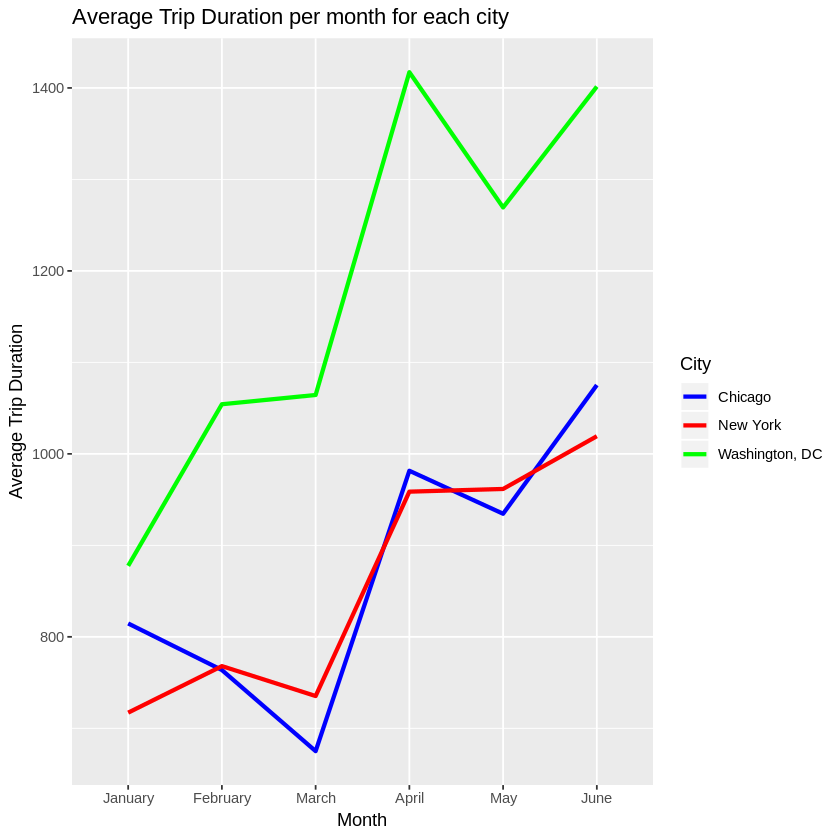

In [13]:
for(i in 1:length(Cities)){
    df.Identity = get.Identity(i)
    
    df = Cities[[i]]
    dfPlot = get.MonthlyAve(df)
    dfPlot$City = df.Identity[[3]]
    MonthlyAve = rbind(MonthlyAve, dfPlot)
}
MonthlyAve = MonthlyAve %>% mutate(month = factor(month, levels = month.name)) %>%
  arrange(City, month)

ggplot(MonthlyAve, aes(x=month, y=Trip.Duration, fill=City, group=City, color=City)) + geom_line(size = 1.2) +
    scale_color_manual(values=c('blue', 'red', 'green')) + 
    scale_x_discrete(limits=c("January", "February", "March", "April", "May", "June"))+
    labs(title="Average Trip Duration per month for each city", x="Month", y="Average Trip Duration")

In [14]:
MonthlyAve

month,year,Trip.Duration,City
January,17,814.6092,Chicago
February,17,763.7086,Chicago
March,17,675.0697,Chicago
April,17,981.5341,Chicago
May,17,934.5375,Chicago
June,17,1075.2344,Chicago
January,17,717.1527,New York
February,17,767.9981,New York
March,17,735.3040,New York
April,17,958.6988,New York


April saw the largest growth for all Cities and was the top average duration month for Washington.  New York and Chicago experienced their highest average duration month in June.


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!